<a href="https://colab.research.google.com/github/Sanskar329/Russian-Letters/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents


## [0. Import Monk](#0)

## [1.Import Dataset From Kaggle](#1)

## [2. Import Libraries](#2)


## [3.Data parser to ingest, explore, and visualize samples.](#3)

## [4. Developing Classifier Models](#4)


#Import Monk

git clone https://github.com/Tessellate-Imaging/monk_v1.git

cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git


Cloning into 'monk_v1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 5997 (delta 73), reused 39 (delta 23), pack-reused 5888
Receiving objects: 100% (5997/5997), 173.44 MiB | 14.01 MiB/s, done.
Resolving deltas: 100% (4071/4071), done.
Checking out files: 100% (1324/1324), done.


In [ ]:
#Install Requirements for Colab
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

     |████████████████████████████████| 711.7MB 25kB/s 
     |████████████████████████████████| 819kB 36.2MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=78b62c6718722fbfaec56dc10aa55876ebbe546682d79f6b4480504ef745a609
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


#Import Dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
#Create a new API by clicking My Account icon in kaggle
#Download kaggle.json
#Upload in colab file using files.upload()
from google.colab import files

files.upload()#Upload the kaggl.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanskar123","key":"fdbd2bbf03565f6e8dbb30124539c93d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download the full dataset zip file to Colab 
! kaggle datasets download -d 'olgabelitskaya/classification-of-handwritten-letters'

 98% 177M/181M [00:05<00:00, 28.2MB/s]
100% 181M/181M [00:05<00:00, 33.1MB/s]


In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k" -O sample.zip && rm -rf /tmp/cookies.txt

--2020-08-18 10:13:44--  https://docs.google.com/uc?export=download&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k
Resolving docs.google.com (docs.google.com)... 64.233.188.113, 64.233.188.100, 64.233.188.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.19K  --.-KB/s    in 0s      

2020-08-18 10:13:45 (35.2 MB/s) - written to stdout [3263]

--2020-08-18 10:13:45--  https://docs.google.com/uc?export=download&confirm=F0sR&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k
Resolving docs.google.com (docs.google.com)... 108.177.125.138, 108.177.125.102, 108.177.125.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-6g-docs.googleusercontent.com/docs/securesc/qi13v74hn73qe4tnjvdopdqlls45tt57/dhktmn

In [ ]:
! unzip -qq sample.zip

In [ ]:
#Unzip the downloaded zip file and put it under a new files section
import zipfile
zip_ref = zipfile.ZipFile('classification-of-handwritten-letters.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

##Import Libraries

In [ ]:
import os
import sys
sys.path.append("monk_v1/");
sys.path.append("monk_v1/monk/");

In [ ]:
#Importing MXNet Gluon API backend
from monk.gluon_prototype import prototype

In [ ]:
import pandas as pd

#Data parser to ingest, explore, and visualize samples.

In [ ]:
#Reading each csv file corresponding to the images
df1=pd.read_csv('/content/files/letters.csv')
df2=pd.read_csv('/content/files/letters2.csv')
df3=pd.read_csv('/content/files/letters3.csv')

In [ ]:
#Visualizing a sample content of CSV file
df1.head()

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0


In [ ]:
#Dropping letters as we have it encoded in form of label in the another column
#Dropping background column as it does not contribute to target
df1.drop(['letter', 'background'], axis = 1,inplace=True) 
df2.drop(['letter', 'background'], axis = 1,inplace=True)
df3.drop(['letter', 'background'], axis = 1,inplace=True) 

In [ ]:
#Keeping columns of the CSV file in desired order
df1 = df1[['file','label']]
df2 = df2[['file','label']]
df3 = df3[['file','label']]

In [ ]:
#Visualizing updated DataFrames
df1.head()

,file,label
0,01_01.png,1
1,01_02.png,1
2,01_03.png,1
3,01_04.png,1
4,01_05.png,1


In [ ]:
#Generating CSV files containing the updated dataframes  
df1.to_csv("files/sanskars1.csv",index=False)
df2.to_csv("files/sanskars2.csv",index=False)
df3.to_csv("files/sanskars3.csv",index=False)

#Resnet34

In [ ]:
#Setup Project Name and Experiment Name
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet");

Mxnet Version: 1.6.0

Experiment Details
    Project: Pilot
    Experiment: Resnet
    Dir: /content/workspace/Pilot/Resnet/



I have not concatenated the 3 csv file together and also the 3 images folders which could lead me to train the entire dataset alltogether
This is because all three have slighly different types of backgrounds.

My approach to building a robust model is by training the model first by using the images which are least affected by the background ,
i.e. letter2 folder .
Also the letter2 dataset is reasonably big (Unlike letter folder) so it can train the model effectively at first.

This would ensure that my model trains and learns to extract desired features and we can verify it by analysing plots for the same.
if we infer that the model learns well on plain background and has learned to extract the correct features , then we continue training the model with letter3 folder which contains images with graph paper background , this dataset is also very big to make so hopefully it makes the model learn to ignore lines in the background.

Then , we continue training the model with letter folder images , which is quite small database , containing gridded and stripped background.



In [ ]:
#Setup the model with images in letter2 folder 
gtf.Default(dataset_path="/content/files/letters2", 
            path_to_csv ="/content/files/sanskars2.csv",
            model_name="resnet34_v2", 
            freeze_base_network=False,
            delimiter = ",",
            num_epochs=5);

Dataset Details
    Train path:     /content/files/letters2
    Val path:       None
    CSV train path: /content/files/sanskars2.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Params
    Model name:           resnet34_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model


100%|██████████| 79087/79087 [00:03<00:00, 25484.47KB/s]


    Model Loaded on device
        Model name:                           resnet34_v2
        Num of potentially trainable layers:  72
        Num of actual trainable layers:       71

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [ ]:
#Shuffle the training data is required because the data is ordered w.r.t labels
gtf.update_shuffle_data(True);
gtf.Reload();

In [ ]:
#Visualizing the models available with Mxnet-Gluon Backend
gtf.List_Models()

Models List: 
    1. alexnet
    2. darknet53
    3. densenet121
    4. densenet161
    5. densenet169
    6. densenet201
    7. inceptionv3
    8. mobilenet1.0
    9. mobilenet0.75
    10. mobilenet0.25
    11. mobilenet0.5
    12. resnet18_v1
    13. resnet34_v1
    14. resnet50_v1
    15. resnet101_v1
    16. resnet152_v1
    17. resnext50_32x4d
    18. resnext101_32x4d
    19. resnext101_64x4d_v1
    20. se_resnext50_32x4d
    21. se_resnext101_32x4d
    22. se_resnext101_64x4d
    23. senet_154
    24. vgg11
    25. vgg13
    26. vgg16
    27. vgg19
    28. vgg11_bn
    29. vgg13_bn
    30. vgg16_bn
    31. vgg19_bn
    32. resnet18_v2
    33. resnet34_v2
    34. resnet50_v2
    35. resnet101_v2
    36. resnet152_v2
    37. mobilenetv2_1.0
    38. mobilenetv2_0.75
    39. mobilenetv2_0.5
    40. mobilenetv2_0.25
    41. squeezenet1.0
    42. squeezenet1.1
    43. mobilenetv3_large
    44. mobilenetv3_small
    45. resnet18_v1b
    46. resnet34_v1b
    47. resnet50_v1b
    48. resn

My Base approach to developing the models for this project was :

1.)First , I selected basic models from models that are available in MXNet Gluon Backend.

2.)I have considered less dense networks for model at first and analysed those networks as to which gives me good performance. I have not just  consider the best model according to val loss , have kept few good  models as they might look better after tuning and increased depth. 

3.)Then i have Tuned the parameters for these models.

4.)After obtaining the optimal hyper parameters, with the same hyperparameters i have tried  dense network for the same model which may increase accuracy.

so , here i have chosen some basic networks and analysed which might works better for me .

In [ ]:
#Analysing basic model
#Inception and exception networks were consuming too much computational time and space
analysis_name = "analyse_models";
models = [["resnet34_v2", False, True],["densenet121", False, True],["vgg16", False, True],["alexnet",False,True],["mobilenetv2_1.0",False , True]];
epochs=5
percent_data=15
analysis = gtf.Analyse_Models(analysis_name, models, percent_data, num_epochs=epochs, state="keep_all");

From the comparison made , it is clear that  densenets , resnets and even mobilenets can give very good performance .

But the width of mobilenets is highest , i.e. it is deepest amongst all its variants like mobilenetsv2_0.75 , mobilenetsv2_0.5 etc .
I should have used 0.25 or 0.5 variant but i did it for full width one which took a lot of time and space.
Also , if i use lower variants , the performance is likely to go low (Although its not always true ).
Still , if we see the documentation , the accuracy has gone down(With Image Net dataset) .
This might not be the case in this model.
I am not building mobilenets for this project , but it might yield good results.


In [ ]:
# I have analysed batch size , learning rate and optimizers and tuned them according to validation and training loss.
#Batch size 4 didn't work out for the model , and batch size more than 8 started increasing the validation loss , so batch size 8 is selected 
gtf.update_batch_size(8);
#learning rate 0.1 and 0.05 were not working well ,lr lesser than that didn't vary much w.r.t almost same val and training loss , so 0.01 best choice  
gtf.update_learning_rate(.01);
#Though optimizers like Adam and its variants are very fast at converging but the problem with them are they sometimes get stuck at local optima's.Mostly this is the case that they didn,t work well here.      
#Whereas famous optimizers linke SGD and SGD plus momentum are slower to converge , but they dont get stuck at local optima easily.
# Here after analysing all these optimizers , sgd worked better.
gtf.optimizer_sgd(0.01);
gtf.Reload();


In [ ]:
#Now that we have tuned important parameters , we move to denser networks with Resnets.
#This takes time but it produces valuable results.
analysis_name = "analyse_models";
models = [["resnet34_v2", False, True],["resnet50_v2", False, True],["resnet101_v2", False, True],["resnet152_v2",False,True]];
epochs=5
percent_data=15
analysis = gtf.Analyse_Models(analysis_name, models, percent_data, 
                              num_epochs=epochs, state="keep_all");

In [ ]:
#resnet34_v2 and resnet152_v2 are giving good performance
#resnet152_v2 looks good but it might also be overfitting.
#Although both models are worth looking.


In [ ]:
#Train
gtf.Train();

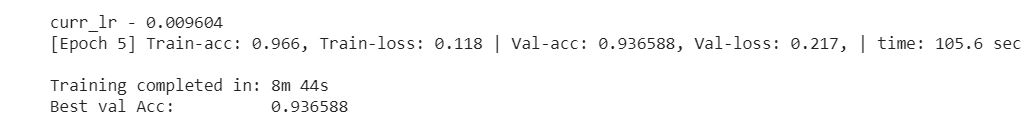

We could have trained all folders images together but:

1.)Now we can analyse each part of training better , and analyse if the model is able to learn well with graph backgrounds or not.
Also , it lets us observe if the model is not learning any specific types of background , so that we can even add more data to that particular section.

2.)With concatenated data , single training and after data shuffling its not possible to analyse each section better. 

3.)There is no harm using 3 different datasets differently , just more training time and few extra plots.

In [ ]:
#Update the dataset and keep this as another experiment. 
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet_2", 
              copy_from=["Pilot", "Resnet"]);

gtf.update_dataset(dataset_path="/content/files/letters3",
                   path_to_csv="/content/files/sanskars3.csv");
                   
gtf.Reload();

In [ ]:
#Train
gtf.Train();

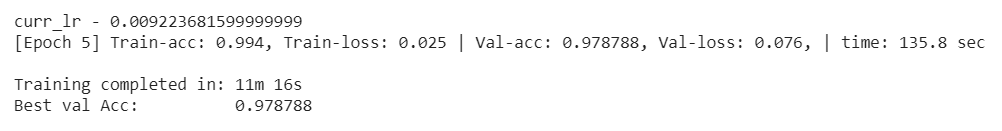

In [ ]:
#Update Again
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet_3", 
              copy_from=["Pilot", "Resnet_2"]);
gtf.update_dataset(dataset_path="/content/files/letters",
                   path_to_csv="/content/files/sanskars1.csv");

gtf.Reload();

In [ ]:
#Train
gtf.Train();

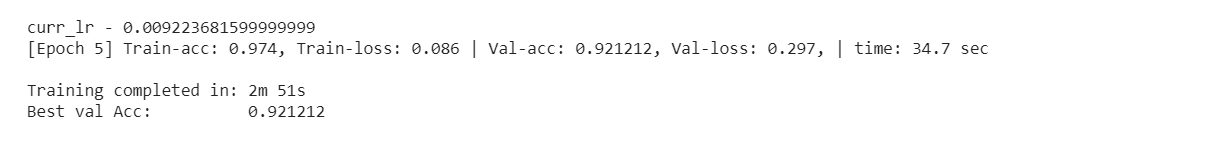

In [ ]:
#Comparing experiments after each dataset updating process
from compare_prototype import compare
gtf = compare(verbose=1);
gtf.Comparison("Comparison")

gtf.Add_Experiment("Pilot", "Resnet");
gtf.Add_Experiment("Pilot", "Resnet_2");
gtf.Add_Experiment("Pilot", "Resnet_3");

gtf.Generate_Statistics()

Comparison: - Comparison
Project - Pilot, Experiment - Resnet added
Project - Pilot, Experiment - Resnet_2 added
Project - Pilot, Experiment - Resnet_3 added
Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

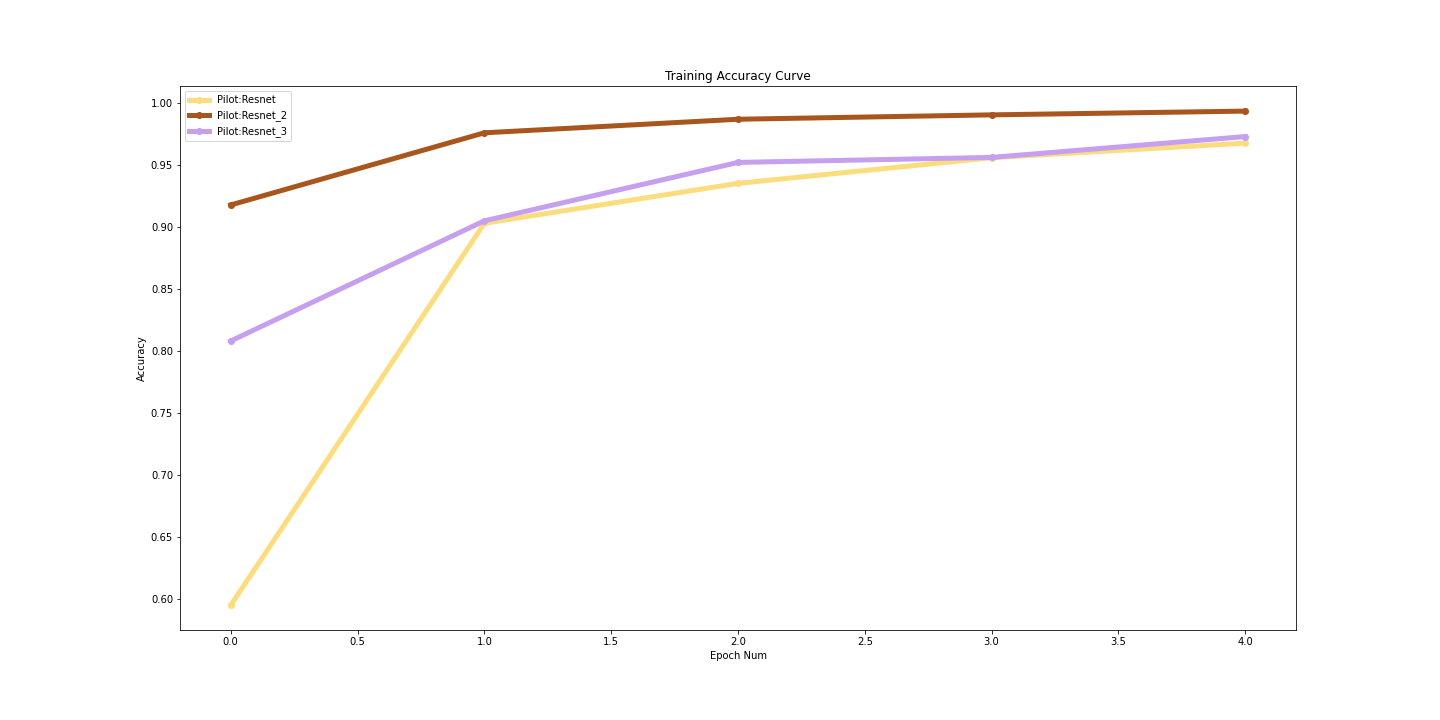

In [ ]:

from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_accuracy.png")

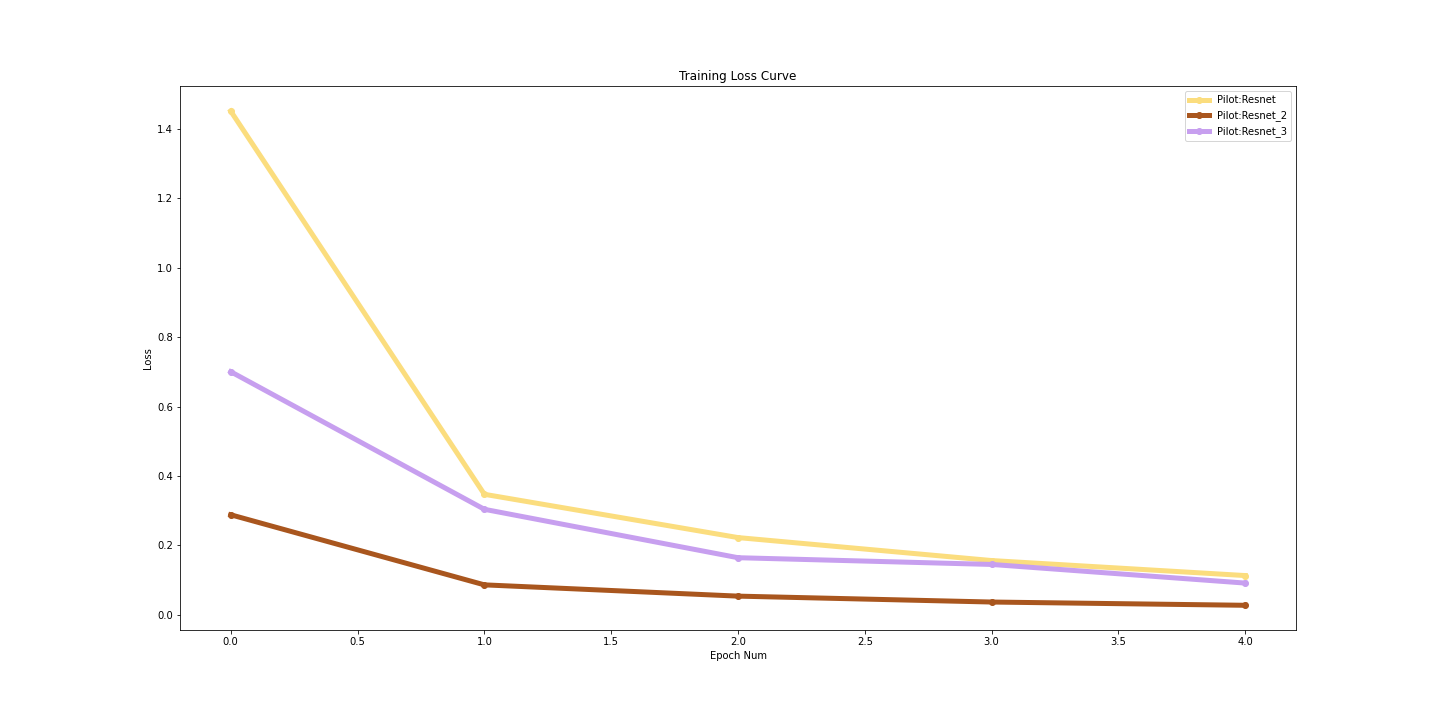

In [ ]:

from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_loss.png")

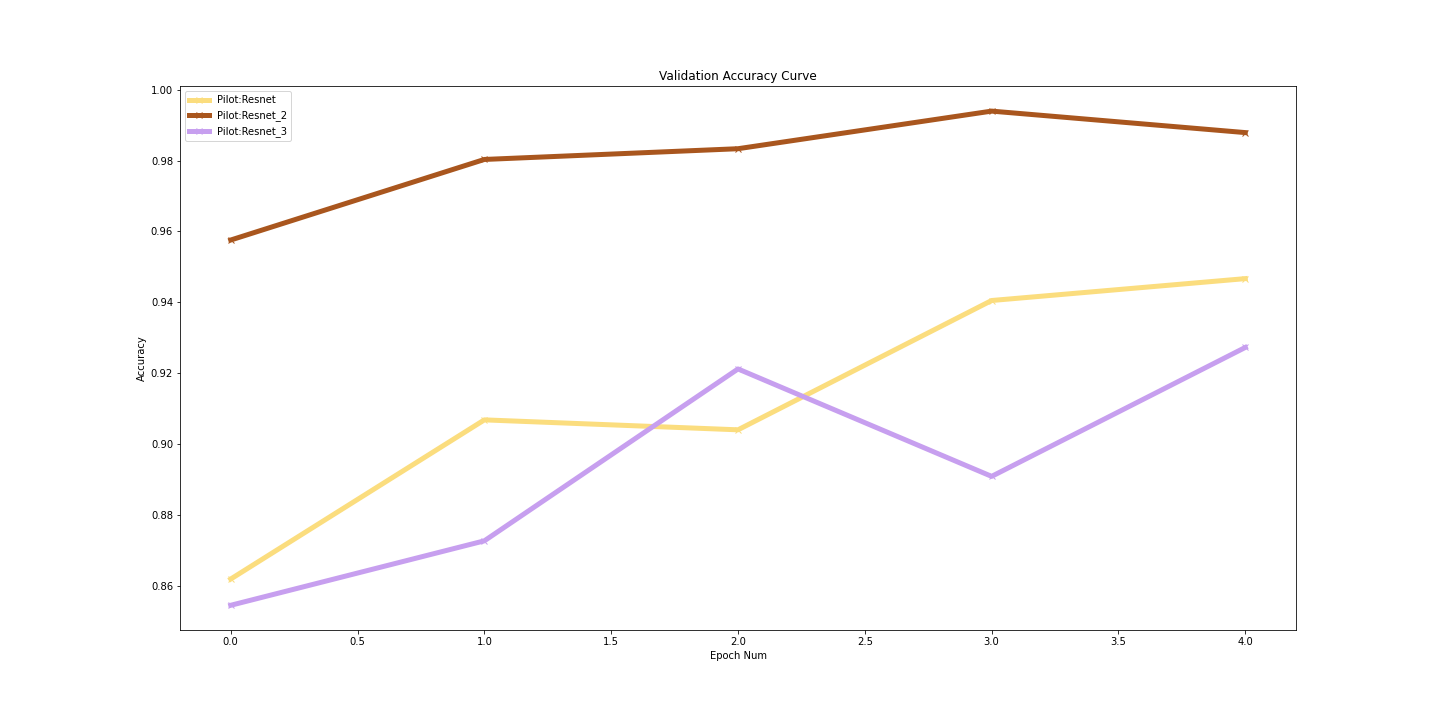

In [ ]:
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_accuracy.png")

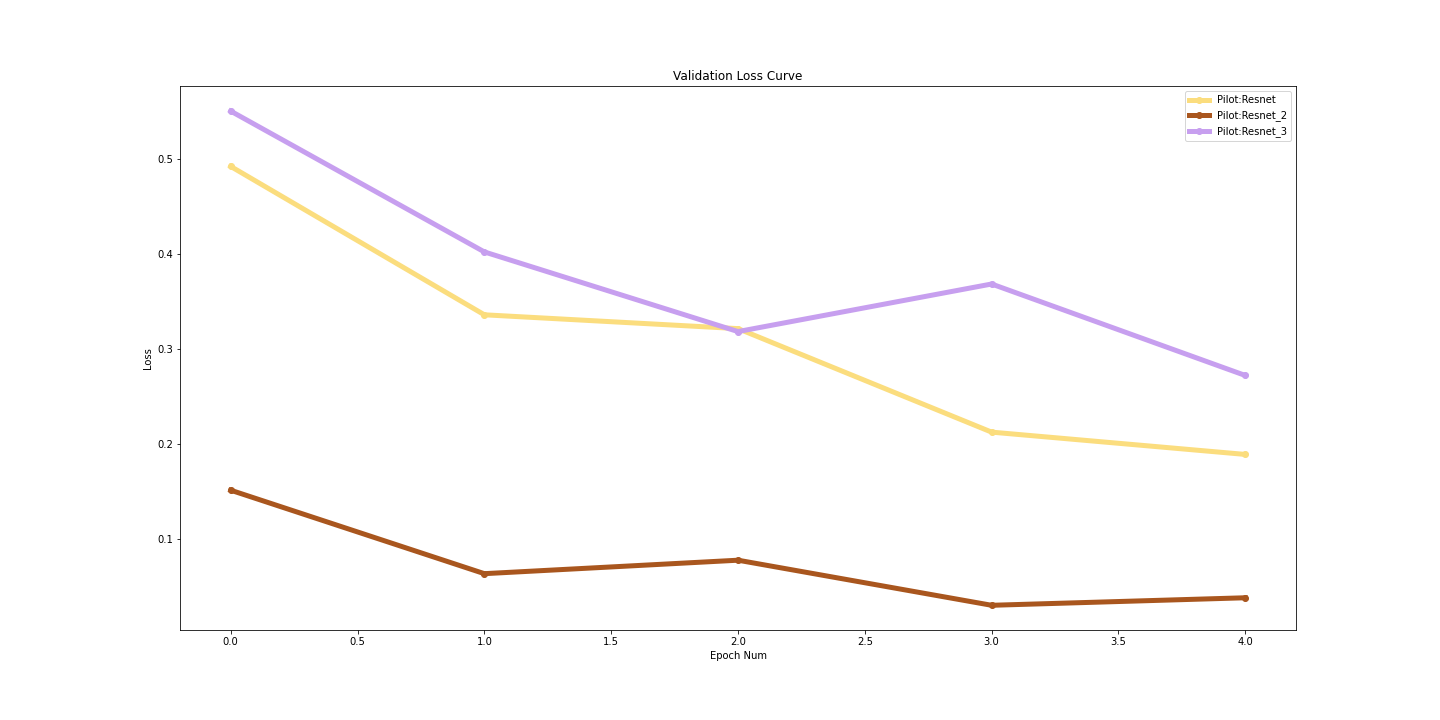

In [ ]:
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_loss.png")

we will go with last model for comparison with next model as that includes training with entire dataset.

#Resnet152

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet152");

Mxnet Version: 1.6.0

Experiment Details
    Project: Pilot
    Experiment: Resnet152
    Dir: /content/workspace/Pilot/Resnet152/



In [ ]:
#Setup the model with images in letter2 folder 
gtf.Default(dataset_path="/content/files/letters2", 
            path_to_csv ="/content/files/sanskars2.csv",
            model_name="resnet152_v2", 
            freeze_base_network=False,
            delimiter = ",",
            num_epochs=5);

In [ ]:
#Shuffling data
gtf.update_shuffle_data(True);
gtf.update_batch_size(8);
#learning rate 0.1 and 0.05 were not working well ,lr lesser than that didn't vary much w.r.t almost same val and training loss , so 0.01 best choice  
gtf.update_learning_rate(.01);
#Though optimizers like Adam and its variants are very fast at converging but the problem with them are they sometimes get stuck at local optima's.Mostly this is the case that they didn,t work well here.      
#Whereas famous optimizers linke SGD and SGD plus momentum are slower to converge , but they dont get stuck at local optima easily.
# Here after analysing all these optimizers , sgd worked better.
gtf.optimizer_sgd(0.01);
gtf.Reload();

In [ ]:
#Training
gtf.Train();

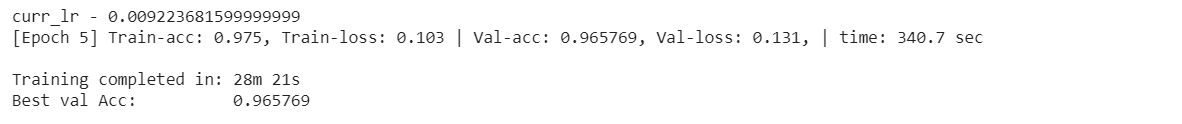

In [ ]:
#Update the dataset and keep this as another experiment. 
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet152_2", 
              copy_from=["Pilot", "Resnet152"]);

gtf.update_dataset(dataset_path="/content/files/letters3",
                   path_to_csv="/content/files/sanskars3.csv");
                   
gtf.Reload();

In [ ]:
gtf.Train();

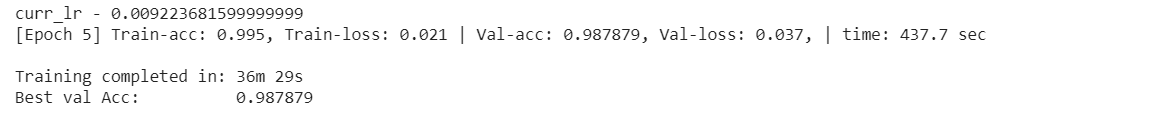

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet152_3", 
              copy_from=["Pilot", "Resnet152_2"]);

gtf.update_dataset(dataset_path="/content/drive/My Drive/letters",
                   path_to_csv="/content/files/sanskars1.csv");
                   
gtf.Reload();

In [ ]:
gtf.Train();

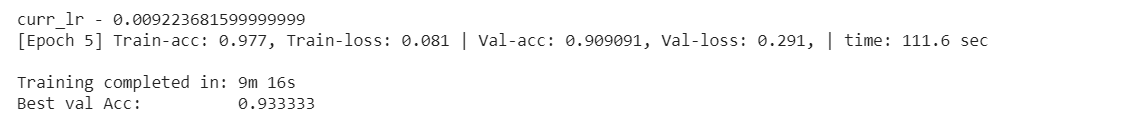

In [ ]:
#Visualizing all three resnet152 experiments
from compare_prototype import compare
gtf = compare(verbose=1);
gtf.Comparison("Comparison")
gtf.Add_Experiment("Pilot", "Resnet152");
gtf.Add_Experiment("Pilot", "Resnet152_2");
gtf.Add_Experiment("Pilot", "Resnet152_3");

gtf.Generate_Statistics()
#Training Loss
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_loss.png")
#Using this we can view the plots for the same
#You can run this to view the plot

In [ ]:
#Training accuracy
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_accuracy.png")

In [ ]:
#Validation Accuracy
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_accuracy.png")

In [ ]:
#Validation Loss
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_loss.png")

#DenseNet

In [ ]:
#Setup Project Name and Experiment name
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Densenet_121");

Mxnet Version: 1.6.0

Experiment Details
    Project: Pilot
    Experiment: Densenet_121
    Dir: /content/workspace/Pilot/Densenet_121/



In [ ]:
#Setup the model with densenet
gtf.Default(dataset_path="/content/files/letters2", 
            path_to_csv ="/content/files/sanskars2.csv",
            model_name="densenet121", 
            freeze_base_network=False,
            delimiter = ",",
            num_epochs=5);

In [ ]:
#Finding best optimizers
analysis_name = "analyse_optimizers";
optimizers = ["sgd", "adam", "adagrad"];
epochs=10
percent_data=5
analysis = gtf.Analyse_Optimizers(analysis_name, optimizers, 
         percent_data, num_epochs=epochs, state="keep_none");



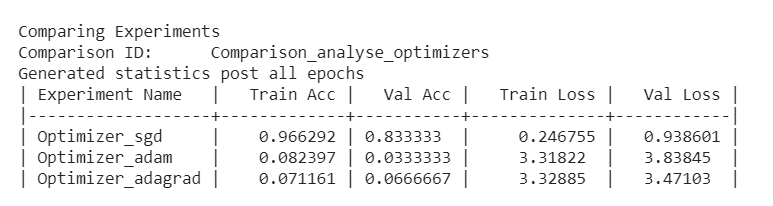

In [ ]:
#Searching optimum learning rates
analysis_name = "analyse_learning_rates"
lrs = [0.1, 0.05, 0.01, 0.005, 0.0001];
percent_data=15
# Num epochs for each sub-experiment to run
epochs=5
analysis = gtf.Analyse_Learning_Rates(analysis_name, lrs, percent_data, 
                                      num_epochs=epochs, state="keep_none");
#After this , we get the analysis as to which learning rates should be used



In [ ]:
#Shuffle the data
gtf.update_shuffle_data(True);
# I have analysed batch size , learning rate and optimizers and tuned them according to validation and training loss.
#For densenets batch size of 2 and 4 did not work well so had to go with 8 , after which validation loss increases 
gtf.update_batch_size(8);
#learning rate 0.1 and 0.05 were not working well ,lr lesser than that didn't vary much w.r.t almost same val and training loss , so 0.01 best choice  
#Though optimizers like Adam and its variants are very fast at converging but the problem with them are they sometimes get stuck at local optima's.Mostly this is the case that they didn,t work well here.      
#Whereas famous optimizers linke SGD and SGD plus momentum are slower to converge , but they dont get stuck at local optima easily.
# Here after analysing all these optimizers , sgd worked better.
#sgd was the best optimizer even for densenets
gtf.optimizer_sgd(0.01);
gtf.Reload();


Update: Data shuffle - True

Update: Batch size - 8

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  242
        Num of actual trainable layers:       242



In [ ]:
#Comparing DenseNets for different depth of densenet variants. 
analysis_name = "analyse_models";
models = [["densenet121", False, True], ["densenet161", False, True], ["densenet169", False, True],["densenet201", False, True]];
epochs=10
percent_data=15
analysis = get.Analyse_Models(analysis_name, models, percent_data, num_epochs=epochs, state="keep_none");

Densenets_121 layers performs better than other higher density densenet.
Although none of them underperforms , which shows that we dont have the any other problem like gradient explosion with higher dense layers.
Still we will use densenets_121 as it will take lesser space and time  

In [ ]:
#Train
gtf.Train();

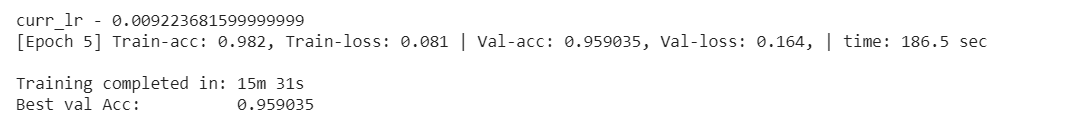

In [ ]:
#Updating new dataset to last experiment  
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Densenet_121_2", 
              copy_from=["Pilot", "Densenet_121"]);
gtf.update_dataset(dataset_path="/content/drive/My Drive/letters",
                   path_to_csv="/content/files/sanskars1.csv");
gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Densenet_121/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Densenet_121_2
    Dir: /content/workspace/Pilot/Densenet_121_2/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1485
    Num val image

In [ ]:
#Continue Training
gtf.Train();

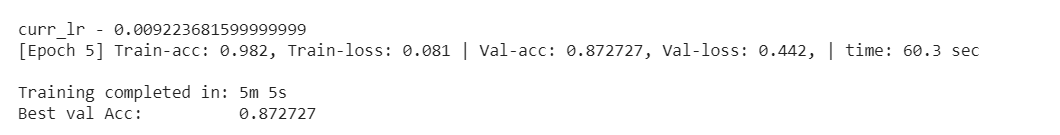

In [ ]:
#Updating additional dataset
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Densenet_121_3", 
              copy_from=["Pilot", "Densenet_121_2"]);
gtf.update_dataset(dataset_path="/content/files/letters3",
                   path_to_csv="/content/files/sanskars3.csv");
gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1485
    Num val images:   165
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Densenet_121_2/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Densenet_121_3
    Dir: /content/workspace/Pilot/Densenet_121_3/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5940
    Num val imag

In [ ]:
gtf.Train();

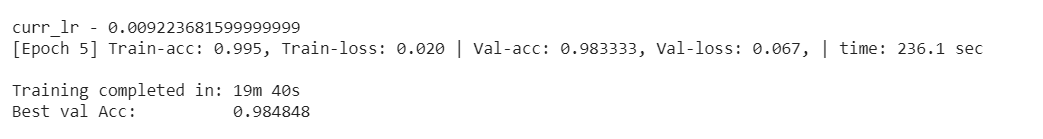

In [ ]:
from compare_prototype import compare

Comparison: - Statistics
Project - Pilot, Experiment - Densenet_121 added
Project - Pilot, Experiment - Densenet_121_2 added
Project - Pilot, Experiment - Densenet_121_3 added
Generating statistics...
Generated



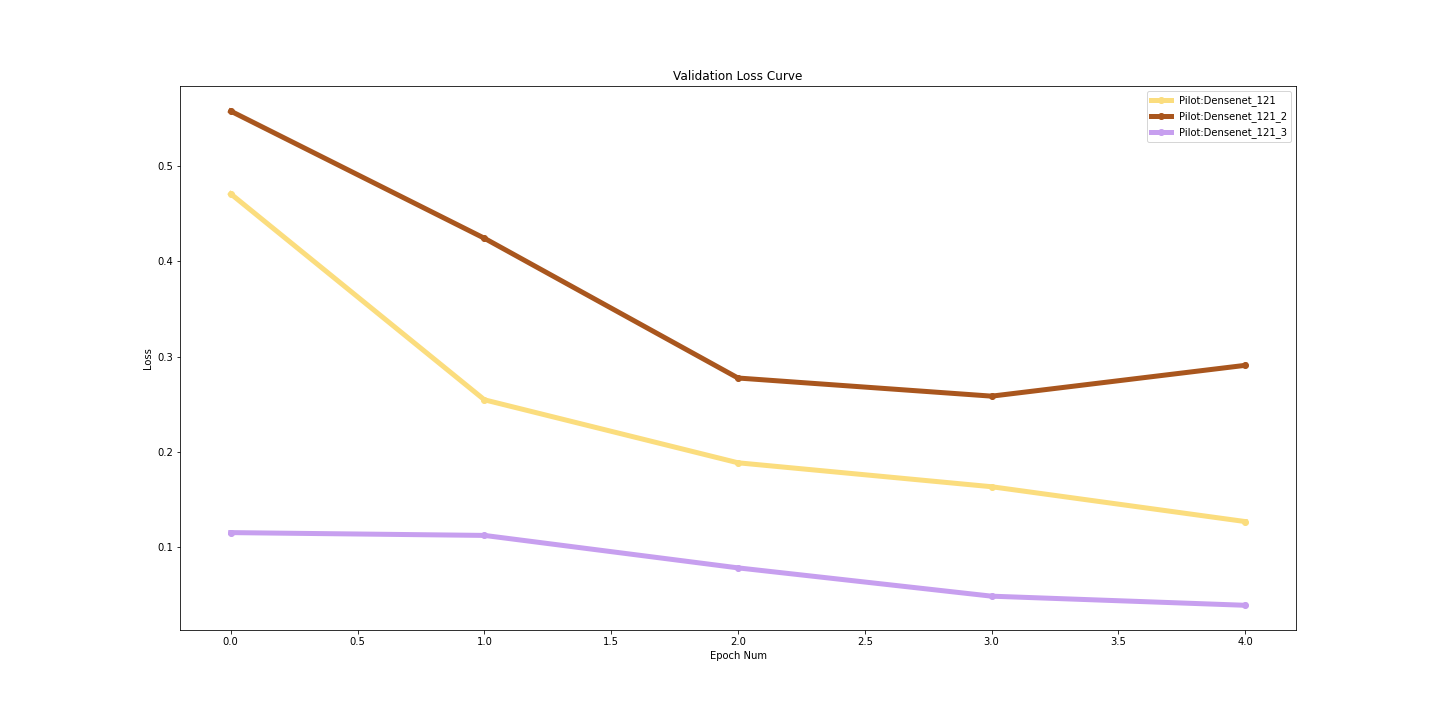

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:

gtf = compare(verbose=1);
gtf.Comparison("Statistics");
os.listdir("workspace/comparison/Statistics")
gtf.Add_Experiment("Pilot", "Densenet_121");
gtf.Add_Experiment("Pilot", "Densenet_121_2");
gtf.Add_Experiment("Pilot", "Densenet_121_3");

gtf.Generate_Statistics();

from IPython.display import Image

Image(filename="workspace/comparison/Statistics/val_loss.png")


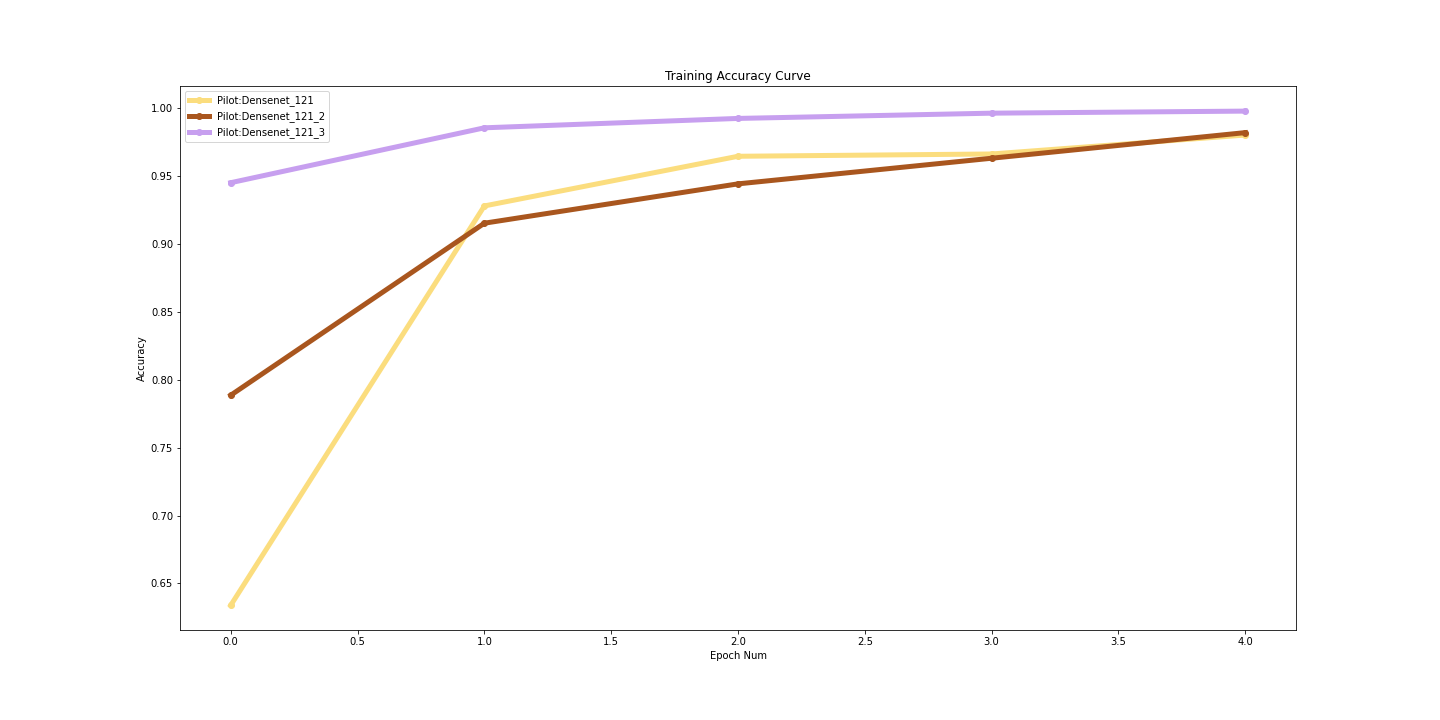

In [ ]:
Image(filename="workspace/comparison/Statistics/train_accuracy.png")


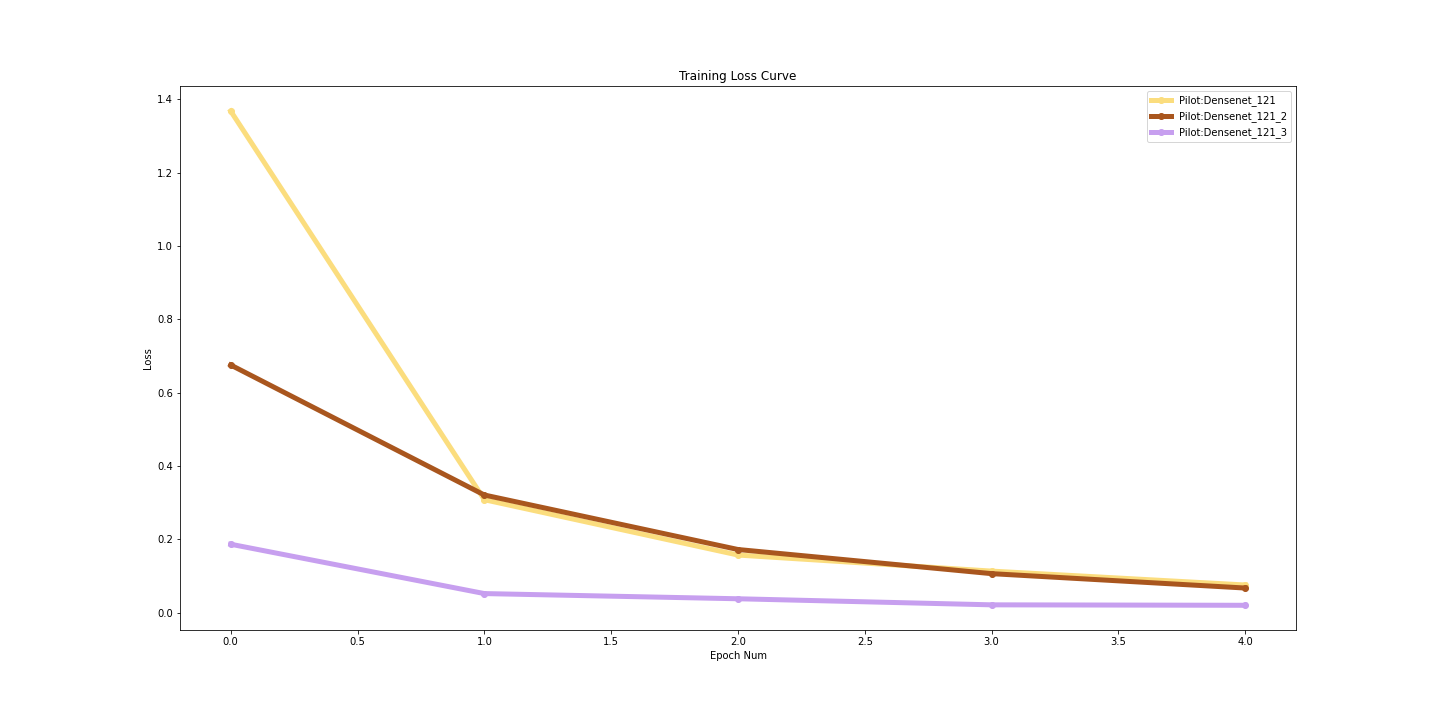

In [ ]:
Image(filename="workspace/comparison/Statistics/train_loss.png")


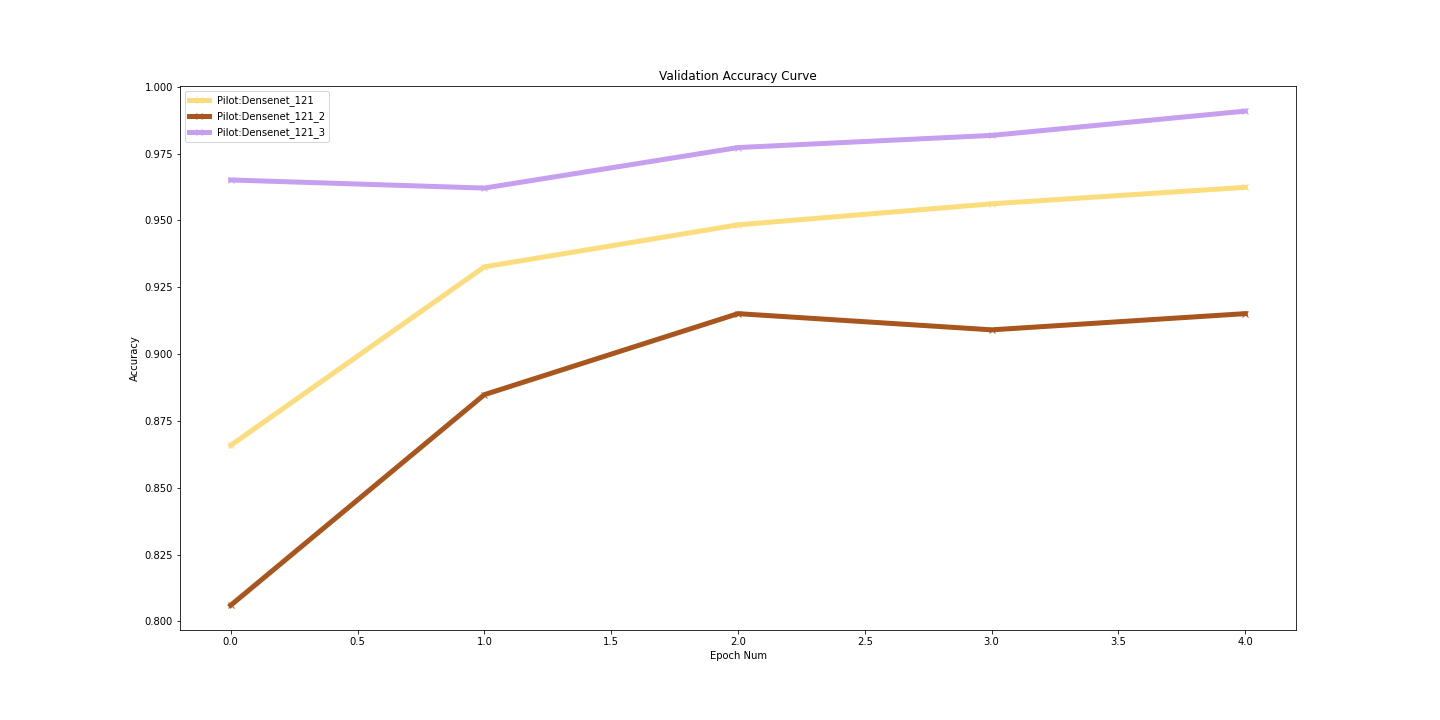

In [ ]:
Image(filename="workspace/comparison/Statistics/val_accuracy.png")